In [1]:
# ARC Simulation
from __future__ import division
from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




3.9.7


ModuleNotFoundError: No module named 'meep'

In [16]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 200
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [17]:
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [18]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(-0.5*sx+1 , 0), 
                     size=mp.Vector3(0, sy)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000786781 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (0,0,0)
          size (8,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 7.05126 s
-----------


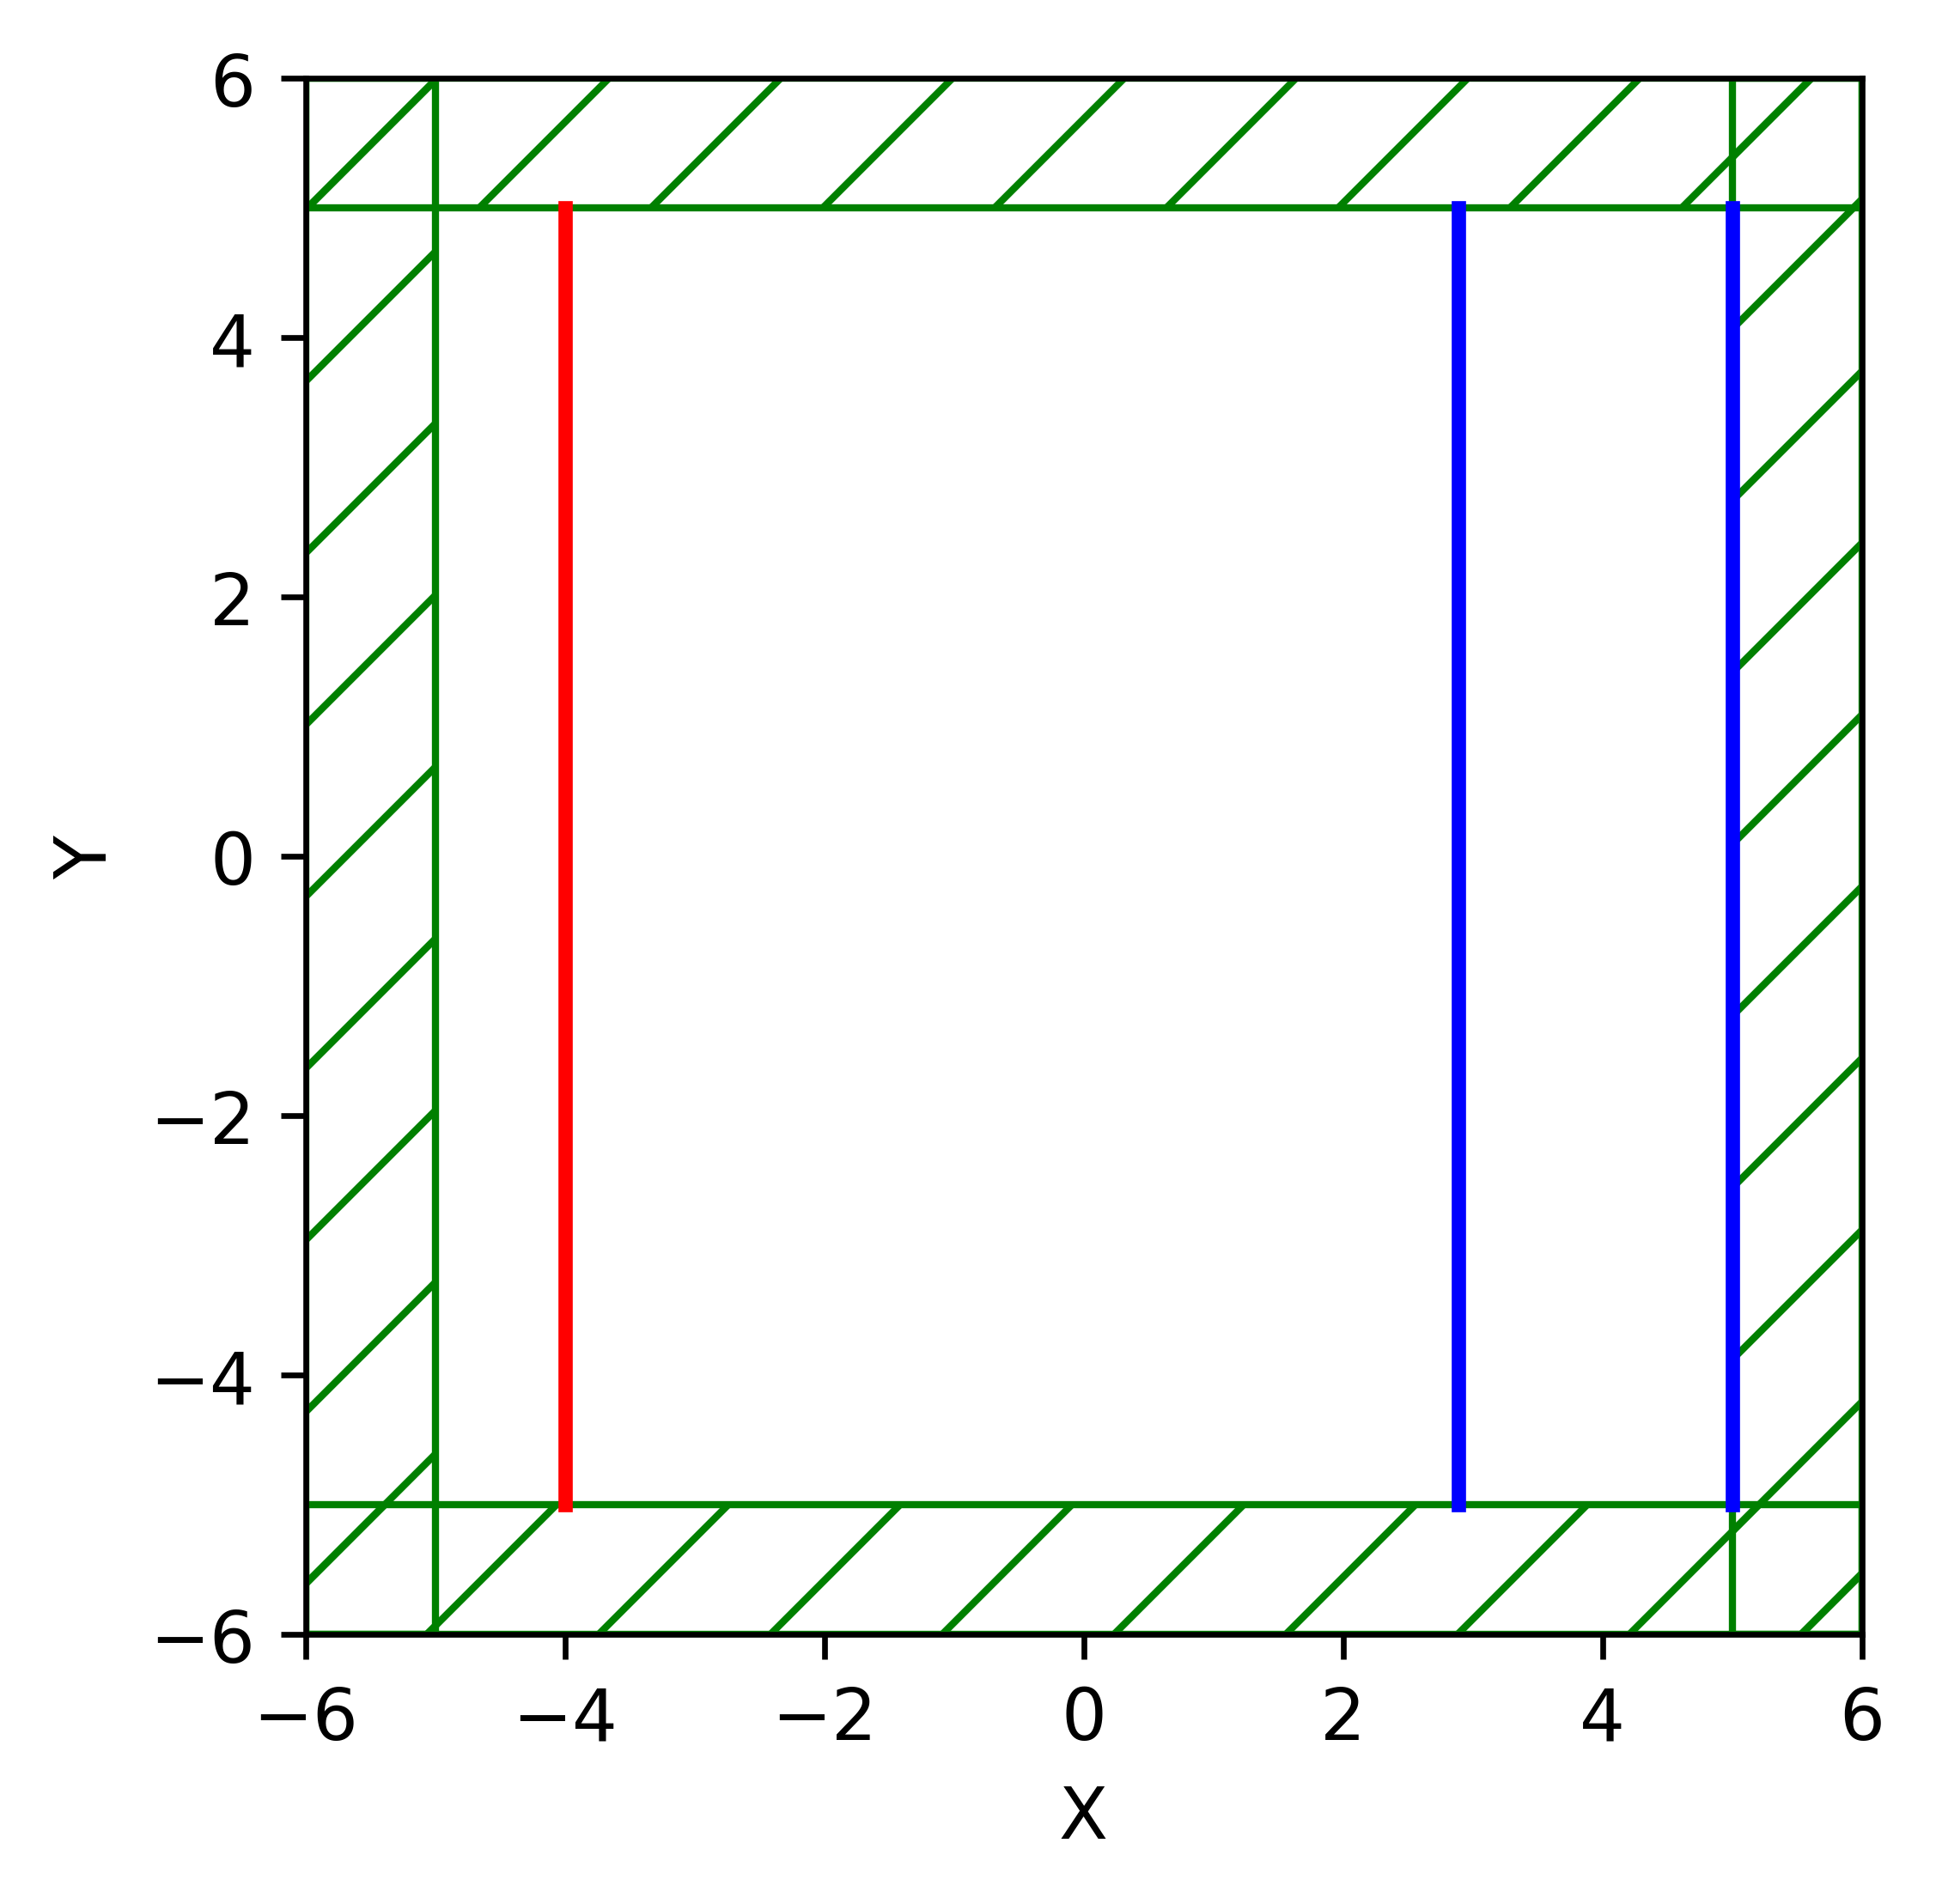

In [19]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [ ]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 63 (time=0.1575), 0.0637213 s/step
on time step 133 (time=0.3325), 0.0576766 s/step
on time step 203 (time=0.5075), 0.0577914 s/step
on time step 273 (time=0.6825), 0.0578752 s/step
on time step 343 (time=0.8575), 0.0577814 s/step
on time step 413 (time=1.0325), 0.0578378 s/step
on time step 483 (time=1.2075), 0.0578247 s/step
on time step 552 (time=1.38), 0.0581444 s/step
on time step 621 (time=1.5525), 0.0585186 s/step
on time step 690 (time=1.725), 0.0587572 s/step
on time step 758 (time=1.895), 0.058968 s/step
on time step 826 (time=2.065), 0.0592679 s/step
on time step 894 (time=2.235), 0.0595483 s/step
on time step 961 (time=2.4025), 0.0597109 s/step
on time step 1028 (time=2.57), 0.0597879 s/step
on time step 1095 (time=2.7375), 0.0599075 s/step
on time step 1162 (time=2.905), 0.0599736 s/step
on time step 1229 (time=3.0725), 0.0601155 s/step
on time step 1296 (time=3.24), 0.0604393 s/step
on time step 1363 (time=3.4075),

In [ ]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

-----------
Initializing structure...
time for choose_chunkdivision = 0.00103092 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 200
     block, center = (3,0,0)
          size (2,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 6.39851 s
lorentzian susceptibility: frequency=1.73, gamma=5
lorentzian susceptibility: frequency=2.76, gamma=0.126
lorentzian susceptibility: frequency=3.64, gamma=0
-----------


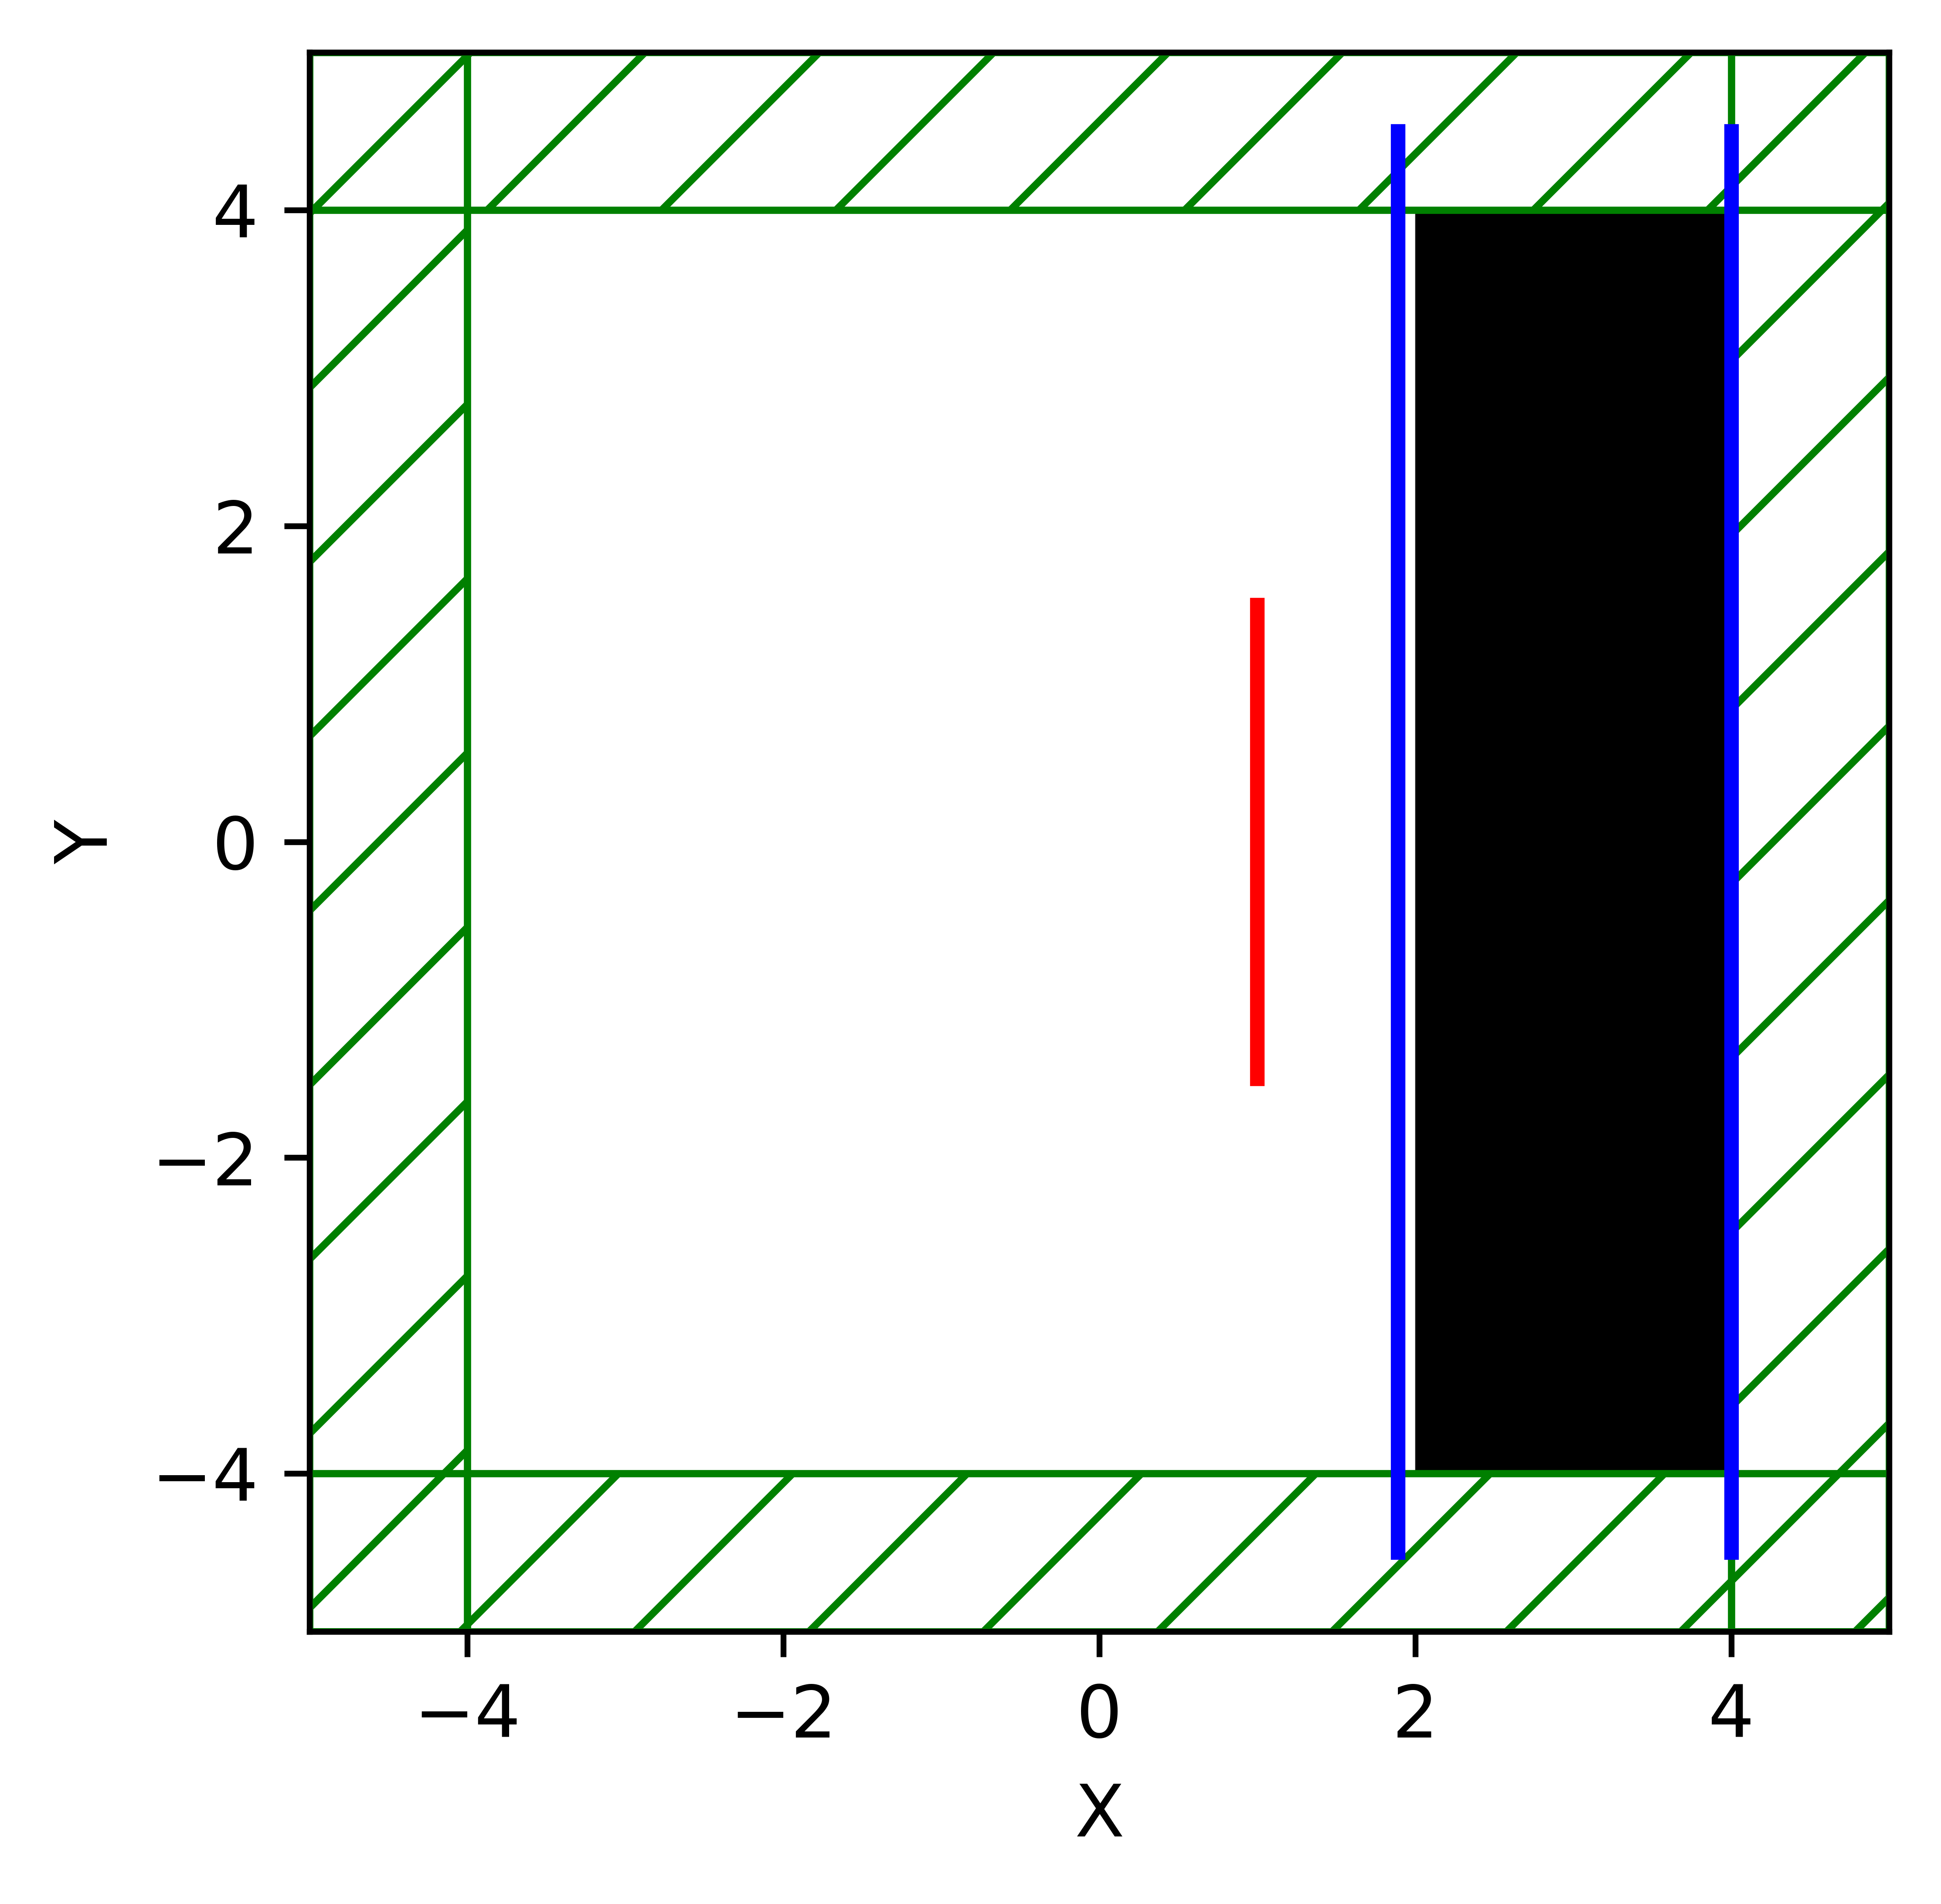

In [8]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Si, 0),
                    material=cSi
                    ),
#            mp.Block(
#                    size=mp.Vector3(T_Arc, sy-2*dpml, mp.inf), 
#                    center=mp.Vector3(0.5*sx-dpml-0.5*T_Arc-T_Si, 0),
#                    material=SiO2)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...
on time step 12 (time=0.03), 0.347709 s/step
on time step 26 (time=0.065), 0.301888 s/step
on time step 40 (time=0.1), 0.303045 s/step
on time step 54 (time=0.135), 0.304641 s/step
on time step 68 (time=0.17), 0.303903 s/step
on time step 82 (time=0.205), 0.301595 s/step
on time step 96 (time=0.24), 0.302369 s/step
on time step 110 (time=0.275), 0.304744 s/step
on time step 124 (time=0.31), 0.304248 s/step
on time step 138 (time=0.345), 0.304798 s/step
on time step 152 (time=0.38), 0.305282 s/step
on time step 166 (time=0.415), 0.304381 s/step
on time step 179 (time=0.4475), 0.312217 s/step
on time step 193 (time=0.4825), 0.306674 s/step
on time step 206 (time=0.515), 0.308462 s/step
on time step 220 (time=0.55), 0.305308 s/step
on time step 233 (time=0.5825), 0.309754 s/step
on time step 246 (time=0.615), 0.3157 s/step
on time step 259 (time=0.6475), 0.314019 s/step
on time step 272 (time=0.68), 0.315522 s/step
on time step 285 (time=0.7125

on time step 2293 (time=5.7325), 0.30456 s/step
on time step 2307 (time=5.7675), 0.306399 s/step
on time step 2321 (time=5.8025), 0.30354 s/step
on time step 2335 (time=5.8375), 0.304848 s/step
on time step 2349 (time=5.8725), 0.305809 s/step
on time step 2363 (time=5.9075), 0.304371 s/step
on time step 2377 (time=5.9425), 0.303957 s/step
on time step 2391 (time=5.9775), 0.303496 s/step
on time step 2404 (time=6.01), 0.308924 s/step
on time step 2418 (time=6.045), 0.30676 s/step
on time step 2432 (time=6.08), 0.304489 s/step
on time step 2446 (time=6.115), 0.304304 s/step
on time step 2460 (time=6.15), 0.303841 s/step
on time step 2474 (time=6.185), 0.305512 s/step
on time step 2488 (time=6.22), 0.304197 s/step
on time step 2502 (time=6.255), 0.3065 s/step
on time step 2516 (time=6.29), 0.306178 s/step
on time step 2529 (time=6.3225), 0.312435 s/step
on time step 2542 (time=6.355), 0.320008 s/step
on time step 2556 (time=6.39), 0.307624 s/step
on time step 2570 (time=6.425), 0.305978 s

on time step 4618 (time=11.545), 0.314187 s/step
on time step 4632 (time=11.58), 0.307268 s/step
on time step 4646 (time=11.615), 0.306846 s/step
on time step 4660 (time=11.65), 0.305389 s/step
on time step 4674 (time=11.685), 0.305186 s/step
on time step 4688 (time=11.72), 0.305566 s/step
on time step 4702 (time=11.755), 0.306743 s/step
on time step 4716 (time=11.79), 0.306197 s/step
on time step 4729 (time=11.8225), 0.309462 s/step
on time step 4743 (time=11.8575), 0.306867 s/step
on time step 4756 (time=11.89), 0.314484 s/step
on time step 4769 (time=11.9225), 0.308784 s/step
on time step 4783 (time=11.9575), 0.306095 s/step
on time step 4797 (time=11.9925), 0.302987 s/step
on time step 4811 (time=12.0275), 0.304024 s/step
on time step 4825 (time=12.0625), 0.304421 s/step
on time step 4838 (time=12.095), 0.313983 s/step
on time step 4852 (time=12.13), 0.304593 s/step
on time step 4866 (time=12.165), 0.304498 s/step
on time step 4879 (time=12.1975), 0.30889 s/step
on time step 4893 (

on time step 6937 (time=17.3425), 0.309549 s/step
on time step 6950 (time=17.375), 0.309489 s/step
on time step 6964 (time=17.41), 0.306322 s/step
on time step 6977 (time=17.4425), 0.310023 s/step
on time step 6990 (time=17.475), 0.312931 s/step
on time step 7003 (time=17.5075), 0.308186 s/step
on time step 7016 (time=17.54), 0.313427 s/step
on time step 7029 (time=17.5725), 0.318038 s/step
on time step 7042 (time=17.605), 0.315944 s/step
on time step 7055 (time=17.6375), 0.319404 s/step
on time step 7068 (time=17.67), 0.31786 s/step
on time step 7081 (time=17.7025), 0.32062 s/step
on time step 7094 (time=17.735), 0.316826 s/step
on time step 7107 (time=17.7675), 0.315876 s/step
on time step 7120 (time=17.8), 0.312734 s/step
on time step 7133 (time=17.8325), 0.31011 s/step
on time step 7147 (time=17.8675), 0.306355 s/step
on time step 7161 (time=17.9025), 0.304844 s/step
on time step 7175 (time=17.9375), 0.306716 s/step
on time step 7189 (time=17.9725), 0.305913 s/step
on time step 720

on time step 9216 (time=23.04), 0.307167 s/step
on time step 9230 (time=23.075), 0.306424 s/step
on time step 9244 (time=23.11), 0.307513 s/step
on time step 9258 (time=23.145), 0.304914 s/step
on time step 9272 (time=23.18), 0.306095 s/step
on time step 9286 (time=23.215), 0.30607 s/step
on time step 9300 (time=23.25), 0.303551 s/step
on time step 9313 (time=23.2825), 0.307703 s/step
on time step 9326 (time=23.315), 0.307747 s/step
on time step 9339 (time=23.3475), 0.308351 s/step
on time step 9353 (time=23.3825), 0.306395 s/step
on time step 9366 (time=23.415), 0.307776 s/step
on time step 9379 (time=23.4475), 0.307784 s/step
on time step 9393 (time=23.4825), 0.307448 s/step
on time step 9407 (time=23.5175), 0.30702 s/step
on time step 9420 (time=23.55), 0.308103 s/step
on time step 9434 (time=23.585), 0.303922 s/step
on time step 9448 (time=23.62), 0.301742 s/step
on time step 9462 (time=23.655), 0.304807 s/step
on time step 9476 (time=23.69), 0.30524 s/step
on time step 9490 (time=

on time step 11481 (time=28.7025), 0.305166 s/step
on time step 11495 (time=28.7375), 0.307039 s/step
on time step 11508 (time=28.77), 0.308151 s/step
on time step 11522 (time=28.805), 0.307714 s/step
on time step 11536 (time=28.84), 0.310322 s/step
on time step 11550 (time=28.875), 0.306177 s/step
on time step 11564 (time=28.91), 0.306769 s/step
on time step 11578 (time=28.945), 0.305972 s/step
on time step 11592 (time=28.98), 0.305175 s/step
on time step 11606 (time=29.015), 0.305541 s/step
on time step 11620 (time=29.05), 0.303581 s/step
on time step 11634 (time=29.085), 0.305525 s/step
on time step 11648 (time=29.12), 0.305587 s/step
on time step 11662 (time=29.155), 0.306396 s/step
on time step 11676 (time=29.19), 0.306519 s/step
on time step 11690 (time=29.225), 0.304469 s/step
on time step 11704 (time=29.26), 0.306776 s/step
on time step 11717 (time=29.2925), 0.329392 s/step
on time step 11730 (time=29.325), 0.315265 s/step
on time step 11743 (time=29.3575), 0.321346 s/step
on t

on time step 13774 (time=34.435), 0.321618 s/step
on time step 13788 (time=34.47), 0.306913 s/step
on time step 13801 (time=34.5025), 0.31264 s/step
on time step 13815 (time=34.5375), 0.304087 s/step
on time step 13829 (time=34.5725), 0.305605 s/step
on time step 13843 (time=34.6075), 0.306996 s/step
on time step 13856 (time=34.64), 0.314084 s/step
on time step 13870 (time=34.675), 0.306627 s/step
on time step 13884 (time=34.71), 0.30459 s/step
on time step 13898 (time=34.745), 0.307584 s/step
on time step 13912 (time=34.78), 0.30643 s/step
on time step 13925 (time=34.8125), 0.310124 s/step
on time step 13939 (time=34.8475), 0.30671 s/step
on time step 13952 (time=34.88), 0.312726 s/step
on time step 13966 (time=34.915), 0.305927 s/step
on time step 13979 (time=34.9475), 0.330815 s/step
on time step 13993 (time=34.9825), 0.30608 s/step
on time step 14007 (time=35.0175), 0.302365 s/step
on time step 14021 (time=35.0525), 0.304946 s/step
on time step 14035 (time=35.0875), 0.305649 s/step

field decay(t = 40.005): 0.0001671396781541858 / 0.004748522551649154 = 0.0351982487892236
on time step 16004 (time=40.01), 0.307614 s/step
on time step 16017 (time=40.0425), 0.308666 s/step
on time step 16030 (time=40.075), 0.30977 s/step
on time step 16043 (time=40.1075), 0.309053 s/step
on time step 16056 (time=40.14), 0.309053 s/step
on time step 16070 (time=40.175), 0.307513 s/step
on time step 16083 (time=40.2075), 0.309071 s/step
on time step 16097 (time=40.2425), 0.303837 s/step
on time step 16111 (time=40.2775), 0.305635 s/step
on time step 16124 (time=40.31), 0.310239 s/step
on time step 16137 (time=40.3425), 0.308425 s/step
on time step 16151 (time=40.3775), 0.304428 s/step
on time step 16164 (time=40.41), 0.308901 s/step
on time step 16177 (time=40.4425), 0.309165 s/step
on time step 16190 (time=40.475), 0.309286 s/step
on time step 16203 (time=40.5075), 0.309512 s/step
on time step 16217 (time=40.5425), 0.303575 s/step
on time step 16231 (time=40.5775), 0.306353 s/step
on 

on time step 18158 (time=45.395), 0.308893 s/step
on time step 18171 (time=45.4275), 0.30903 s/step
on time step 18185 (time=45.4625), 0.307344 s/step
on time step 18199 (time=45.4975), 0.307202 s/step
on time step 18212 (time=45.53), 0.309479 s/step
on time step 18225 (time=45.5625), 0.310885 s/step
on time step 18238 (time=45.595), 0.321796 s/step
on time step 18251 (time=45.6275), 0.310769 s/step
on time step 18264 (time=45.66), 0.310789 s/step
on time step 18277 (time=45.6925), 0.311733 s/step
on time step 18290 (time=45.725), 0.311977 s/step
on time step 18303 (time=45.7575), 0.310899 s/step
on time step 18316 (time=45.79), 0.311188 s/step
on time step 18329 (time=45.8225), 0.314758 s/step
on time step 18342 (time=45.855), 0.314762 s/step
on time step 18355 (time=45.8875), 0.317975 s/step
on time step 18368 (time=45.92), 0.319201 s/step
on time step 18381 (time=45.9525), 0.318997 s/step
on time step 18394 (time=45.985), 0.319095 s/step
on time step 18407 (time=46.0175), 0.319305 s

on time step 20359 (time=50.8975), 0.257624 s/step
on time step 20375 (time=50.9375), 0.258749 s/step
on time step 20394 (time=50.985), 0.216487 s/step
on time step 20415 (time=51.0375), 0.197537 s/step
on time step 20436 (time=51.09), 0.195065 s/step
on time step 20457 (time=51.1425), 0.196579 s/step
on time step 20478 (time=51.195), 0.196295 s/step
on time step 20499 (time=51.2475), 0.196029 s/step
on time step 20520 (time=51.3), 0.196273 s/step
on time step 20540 (time=51.35), 0.203541 s/step
on time step 20558 (time=51.395), 0.225706 s/step
on time step 20574 (time=51.435), 0.258375 s/step
on time step 20590 (time=51.475), 0.259446 s/step
on time step 20606 (time=51.515), 0.259833 s/step
on time step 20622 (time=51.555), 0.258535 s/step
on time step 20637 (time=51.5925), 0.267461 s/step
on time step 20651 (time=51.6275), 0.292847 s/step
on time step 20664 (time=51.66), 0.326544 s/step
on time step 20677 (time=51.6925), 0.327971 s/step
on time step 20690 (time=51.725), 0.326008 s/st

on time step 22569 (time=56.4225), 0.322825 s/step
on time step 22582 (time=56.455), 0.320327 s/step
on time step 22595 (time=56.4875), 0.320152 s/step
on time step 22608 (time=56.52), 0.320761 s/step
on time step 22621 (time=56.5525), 0.320887 s/step
on time step 22634 (time=56.585), 0.322039 s/step
on time step 22647 (time=56.6175), 0.323143 s/step
on time step 22660 (time=56.65), 0.323461 s/step
on time step 22672 (time=56.68), 0.339074 s/step
on time step 22685 (time=56.7125), 0.320417 s/step
on time step 22698 (time=56.745), 0.319495 s/step
on time step 22711 (time=56.7775), 0.319365 s/step
on time step 22724 (time=56.81), 0.318617 s/step
on time step 22737 (time=56.8425), 0.31607 s/step
on time step 22750 (time=56.875), 0.316743 s/step
on time step 22763 (time=56.9075), 0.320853 s/step
on time step 22776 (time=56.94), 0.322502 s/step
on time step 22789 (time=56.9725), 0.323163 s/step
on time step 22802 (time=57.005), 0.318365 s/step
on time step 22815 (time=57.0375), 0.318095 s/s

on time step 24654 (time=61.635), 0.328077 s/step
on time step 24667 (time=61.6675), 0.327537 s/step
on time step 24680 (time=61.7), 0.328539 s/step
on time step 24693 (time=61.7325), 0.327151 s/step
on time step 24706 (time=61.765), 0.328346 s/step
on time step 24719 (time=61.7975), 0.327499 s/step
on time step 24732 (time=61.83), 0.328968 s/step
on time step 24745 (time=61.8625), 0.326201 s/step
on time step 24758 (time=61.895), 0.326405 s/step
on time step 24771 (time=61.9275), 0.326409 s/step
on time step 24784 (time=61.96), 0.327892 s/step
on time step 24797 (time=61.9925), 0.328464 s/step
on time step 24810 (time=62.025), 0.324467 s/step
on time step 24823 (time=62.0575), 0.322005 s/step
on time step 24836 (time=62.09), 0.324238 s/step
on time step 24849 (time=62.1225), 0.322154 s/step
on time step 24862 (time=62.155), 0.322605 s/step
on time step 24875 (time=62.1875), 0.324383 s/step
on time step 24888 (time=62.22), 0.327739 s/step
on time step 24901 (time=62.2525), 0.327258 s/s

on time step 26778 (time=66.945), 0.334141 s/step
on time step 26791 (time=66.9775), 0.328389 s/step
on time step 26804 (time=67.01), 0.327338 s/step
on time step 26817 (time=67.0425), 0.328709 s/step
on time step 26830 (time=67.075), 0.326085 s/step
on time step 26843 (time=67.1075), 0.325753 s/step
on time step 26856 (time=67.14), 0.325094 s/step
on time step 26869 (time=67.1725), 0.326945 s/step
on time step 26882 (time=67.205), 0.331704 s/step
on time step 26895 (time=67.2375), 0.328083 s/step
on time step 26908 (time=67.27), 0.325202 s/step
on time step 26921 (time=67.3025), 0.327857 s/step
on time step 26934 (time=67.335), 0.330174 s/step
on time step 26947 (time=67.3675), 0.332611 s/step
on time step 26960 (time=67.4), 0.330239 s/step
on time step 26973 (time=67.4325), 0.326921 s/step
on time step 26986 (time=67.465), 0.327465 s/step
on time step 26999 (time=67.4975), 0.327522 s/step
on time step 27012 (time=67.53), 0.325207 s/step
on time step 27025 (time=67.5625), 0.325675 s/s

on time step 28880 (time=72.2), 0.325654 s/step
on time step 28893 (time=72.2325), 0.32542 s/step
on time step 28906 (time=72.265), 0.325485 s/step
on time step 28919 (time=72.2975), 0.326187 s/step
on time step 28932 (time=72.33), 0.325846 s/step
on time step 28945 (time=72.3625), 0.324668 s/step
on time step 28958 (time=72.395), 0.324516 s/step
on time step 28971 (time=72.4275), 0.324544 s/step
on time step 28984 (time=72.46), 0.324486 s/step
on time step 28997 (time=72.4925), 0.328027 s/step
on time step 29010 (time=72.525), 0.323178 s/step
on time step 29023 (time=72.5575), 0.324039 s/step
on time step 29036 (time=72.59), 0.322842 s/step
on time step 29049 (time=72.6225), 0.322496 s/step
on time step 29062 (time=72.655), 0.323018 s/step
on time step 29075 (time=72.6875), 0.326864 s/step
on time step 29088 (time=72.72), 0.329317 s/step
on time step 29100 (time=72.75), 0.336347 s/step
on time step 29113 (time=72.7825), 0.326898 s/step
on time step 29126 (time=72.815), 0.32422 s/step


on time step 31001 (time=77.5025), 0.33212 s/step
on time step 31013 (time=77.5325), 0.340578 s/step
on time step 31025 (time=77.5625), 0.336037 s/step
on time step 31037 (time=77.5925), 0.335615 s/step
on time step 31049 (time=77.6225), 0.336296 s/step
on time step 31061 (time=77.6525), 0.33577 s/step
on time step 31073 (time=77.6825), 0.340094 s/step
on time step 31085 (time=77.7125), 0.335199 s/step
on time step 31097 (time=77.7425), 0.338978 s/step
on time step 31109 (time=77.7725), 0.33686 s/step
on time step 31121 (time=77.8025), 0.33658 s/step
on time step 31133 (time=77.8325), 0.336039 s/step
on time step 31145 (time=77.8625), 0.334664 s/step
on time step 31157 (time=77.8925), 0.335797 s/step
on time step 31170 (time=77.925), 0.327377 s/step
on time step 31183 (time=77.9575), 0.326846 s/step
on time step 31196 (time=77.99), 0.326012 s/step
on time step 31209 (time=78.0225), 0.327722 s/step
on time step 31222 (time=78.055), 0.32534 s/step
on time step 31235 (time=78.0875), 0.327

In [10]:
no_ARC_refl_data

FluxData(E=array([2.96885261e-08+8.71092132e-08j, 2.58381238e-08+8.72555190e-08j,
       2.21913269e-08+8.71754376e-08j, ...,
       5.34932400e-09+1.59938463e-08j, 4.14503903e-09+1.61391788e-08j,
       2.94633171e-09+1.61933001e-08j]), H=array([ 1.24459503e-05+1.20921275e-05j,  1.20220415e-05+1.28344565e-05j,
        1.15650194e-05+1.35654736e-05j, ...,
       -2.77240729e-06+1.35683269e-05j, -3.61709548e-06+1.31677889e-05j,
       -4.42215588e-06+1.27154814e-05j]))

In [11]:
no_ARC_refl_flux

[1.3978762906043582e-06,
 1.4582985768877752e-06,
 1.5212054856253973e-06,
 1.5866937050794571e-06,
 1.6548634593009728e-06,
 1.7258186282711286e-06,
 1.799666871731079e-06,
 1.8765197567941961e-06,
 1.956492889439525e-06,
 2.0397060499894996e-06,
 2.1262833326800336e-06,
 2.2163532894348306e-06,
 2.310049077960056e-06,
 2.407508614278042e-06,
 2.508874729821543e-06,
 2.614295333209758e-06,
 2.7239235768280927e-06,
 2.837918028336112e-06,
 2.9564428472177653e-06,
 3.0796679664999116e-06,
 3.2077692797525562e-06,
 3.3409288334903532e-06,
 3.479335025092716e-06,
 3.6231828063630425e-06,
 3.772673892848612e-06,
 3.928016979047897e-06,
 4.089427959636934e-06,
 4.257130156850944e-06,
 4.431354554163179e-06,
 4.612340036410321e-06,
 4.800333636515659e-06,
 4.995590788966453e-06,
 5.198375590205369e-06,
 5.408961066094057e-06,
 5.627629446608181e-06,
 5.854672447921408e-06,
 6.090391562030842e-06,
 6.3350983540769905e-06,
 6.589114767502703e-06,
 6.852773437198624e-06,
 7.126418010776981e-06,

In [12]:
no_ARC_tran_flux

[1.3683415544603455e-06,
 1.4279384422761152e-06,
 1.4900061897349297e-06,
 1.5546415181169208e-06,
 1.6219446824650558e-06,
 1.6920195899105668e-06,
 1.7649739215405466e-06,
 1.84091925791085e-06,
 1.9199712083065823e-06,
 2.002249543854153e-06,
 2.0878783345858668e-06,
 2.176986090557316e-06,
 2.26970590711456e-06,
 2.3661756144059792e-06,
 2.466537931231701e-06,
 2.570940623322072e-06,
 2.6795366661355453e-06,
 2.7924844122731895e-06,
 2.9099477635968863e-06,
 3.0320963481610426e-06,
 3.159105702055906e-06,
 3.291157456277408e-06,
 3.42843952874166e-06,
 3.571146321568879e-06,
 3.719478923769955e-06,
 3.8736453194711445e-06,
 4.033860601818944e-06,
 4.200347192708179e-06,
 4.373335068476568e-06,
 4.553061991708598e-06,
 4.739773749288176e-06,
 4.933724396836245e-06,
 5.135176509664382e-06,
 5.344401440373357e-06,
 5.561679583218699e-06,
 5.787300645366977e-06,
 6.021563925163388e-06,
 6.264778597532838e-06,
 6.517264006641681e-06,
 6.779349965951915e-06,
 7.051377065805901e-06,
 7.3

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('wo_ARC.csv')

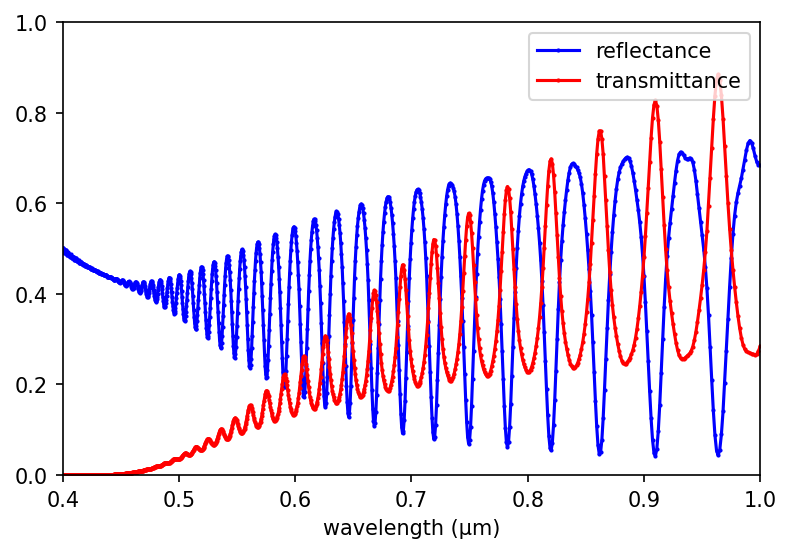

In [15]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance',markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance' ,markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()